# Librairie `pandas` & `matplotlib`

<div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div>

## À la découverte des planètes extrasolaires

Le fichier [`planets.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/planets.csv) contient des informations relatives aux planètes extrasolaires depuis la première "découverte" en 1989. Le document fait notamment référence aux techniques de découverte de ces objets et recense les informations glanées par leurs découvreurs : période orbitale en jours, masse de la planète, distance à l'objet en années lumières et année de découverte. Dans cet exercice, on utilisera le module `pandas` plus à même de traiter des fichiers de données mélant données numériques et alphanumériques.

- Après avoir lu le fichier, afficher un premier résumé des propriétés statistiques du fichier.

In [1]:
import pandas as pd
planets = pd.read_csv("planets.csv", sep=",")
planets.shape, planets.columns, planets.dtypes, planets.describe()

((1035, 6),
 Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object'),
 method             object
 number              int64
 orbital_period    float64
 mass              float64
 distance          float64
 year                int64
 dtype: object,
        number  orbital_period        mass     distance         year
 count  1035.0      992.000000  513.000000   808.000000  1035.000000
 mean      1.0     2002.917596    2.638161   264.069282  2009.070531
 std       0.0    26014.728304    3.818617   733.116493     3.972567
 min       1.0        0.090706    0.003600     1.350000  1989.000000
 25%       1.0        5.442540    0.229000    32.560000  2007.000000
 50%       1.0       39.979500    1.260000    55.250000  2010.000000
 75%       1.0      526.005000    3.040000   178.500000  2012.000000
 max       1.0   730000.000000   25.000000  8500.000000  2014.000000)

- Faire de même en ayant au préalable regroupé les données par méthode de détection.

In [2]:
planets.sort_values(by="method")

,method,number,orbital_period,mass,distance,year
537,Astrometry,1,1016.000000,NaN,14.98,2010
113,Astrometry,1,246.360000,NaN,20.77,2013
37,Eclipse Timing Variations,1,5767.000000,NaN,130.72,2008
44,Eclipse Timing Variations,1,1916.250000,NaN,NaN,2011
43,Eclipse Timing Variations,1,5840.000000,NaN,NaN,2011
...,...,...,...,...,...,...
1034,Transit,1,4.187757,NaN,260.00,2008
736,Transit Timing Variations,1,57.011000,NaN,855.00,2012
680,Transit Timing Variations,1,160.000000,NaN,2119.00,2011
813,Transit Timing Variations,1,22.339500,NaN,339.00,2013


- Représenter le nombre de planètes découvertes en fonction du temps.

<AxesSubplot:xlabel='year'>

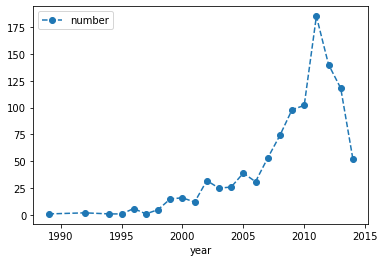

In [6]:
planets[["year","number"]].groupby("year").sum().plot(style="--o")

- Représenter cette même information en fonction de la méthode utilisée pour la découverte.

In [86]:
planets[["number","method"]].groupby("method").sum()

,number
method,
Astrometry,2
Eclipse Timing Variations,9
Imaging,38
Microlensing,23
Orbital Brightness Modulation,3
Pulsar Timing,5
Pulsation Timing Variations,1
Radial Velocity,553
Transit,397


-  Pour les deux principales méthodes, représenter la variation de la période orbitale en fonction
   de la distance à la planète. Finalement, ajouter à la figure précédente, deux sous-figures,
   présentant les distributions de période orbitale et de distance pour chacune des deux
   méthodes. Les trois représentations doivent figurer sur la même figure et conclure quant aux
   caractéristiques des objets extrasolaires mis en évidence par chacune des deux méthodes.

In [40]:
methods_principales=["Radial Velocity", "Transit"]
planets.pivot_table(values="distance", columns="orbital_period",index="method").loc[["Radial Velocity", "Transit"]]


orbital_period,0.090706,0.240104,0.342887,0.453285,0.736540,0.742960,0.788840,0.813475,0.837495,0.853585,...,8679.700000,9017.800000,10037.500000,14002.000000,17337.500000,18000.000000,37000.000000,69000.000000,170000.000000,318280.000000
method,,,,,,,,,,,,,,,,,,,,,
Radial Velocity,NaN,NaN,NaN,NaN,12.53,NaN,NaN,NaN,NaN,NaN,...,NaN,44.8,NaN,14.08,23.98,NaN,NaN,NaN,NaN,NaN
Transit,NaN,NaN,NaN,38.7,NaN,303.0,250.0,80.0,173.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
methods_principales=["Radial Velocity", "Transit"]
planets[planets.method.isin(methods_principales)][["orbital_period","distance"]].fillna(0)

,orbital_period,distance
0,269.300000,77.40
1,874.774000,56.95
2,763.000000,19.84
3,326.030000,110.62
4,516.220000,119.47
...,...,...
1030,3.941507,172.00
1031,2.615864,148.00
1032,3.191524,174.00
1033,4.125083,293.00


---

## Analyse des résultats lors de l'élection présidentielle américaine de 2020 *(extrait de l'examen 2021 - 2022)*

On propose dans ce premier exercice une analyse succincte des résultats obtenus lors de l'élection présidentielle américaine de 2020. Le fichier [`president_county_candidate.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/president_county_candidate.csv) contient les résultats pour chaque comté (*county*) de chaque état (*state*). En plus du nom du candidat, figurent le partie politique associé (*party*), le nombre de voix obtenus par le candidat (*total_votes*) et si le comté a été remporté par le candidat (*won*). 

1. Charger le fichier dans un objet `pandas.DataFrame` et afficher les premières lignes.  

2. Déterminer le nombre total de votants lors de cette élection.

3. Déterminer le nombre de votants par état et afficher ce résultat sous la forme d'un histogramme en ayant préalablement classé ces données par ordre décroissant. Représenter cette même information exprimée en pourcent du nombre total de votants.

4. Déterminer le nombre total de votes par candidat et trier ces résultats depuis le candidat ayant reçu le plus de votes à celui ayant été le moins sollicité. 

5. Trouver l'unique comté remporté par Jo Jorgensen puis afficher l'ensemble des résultats dans ce comté.

6. Dans cette partie, on s'intéresse plus particulièrement aux résultats obtenus par le candidat démocrate Joe Biden et par son principal adversaire, le candidat républicain Donald Trump.
    1. Sélectionner les données correspondant à ces deux candidats.
    2. Grouper les données par état et par candidat afin d'établir pour chacun des deux candidats le nombre total de votes par état. Afficher les résultats sous la forme d'un tableau. 
    3. Calculer la différence de voix entre chaque candidat pour chaque état puis représenter graphiquement cette différence afin d'établir quels états ont voté majoritairement pour les démocrates ou pour les républicains.
    4. Combien de voix au total séparent Joe Biden de Donald Trump.

---

## *Iris setosa, Iris virginica et Iris versicolor*

Le jeu de données *Iris* contient les propriétés morphologiques de 3 espèces de fleur d'iris collectées par Edgar Anderson. Ce jeu de données est surtout reputé par l'utilisation faite en 1936 par Ronald Fisher pour démontrer la puissance de son algorithme d'analyse discriminante linéaire à même de séparer les 3 espèces de fleur d'iris. Ces données sont devenues depuis un cas typique pour de nombreuses techniques de classification automatique en *machine learning*.

- Télécharger le fichier [`iris.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/iris.csv). Charger ce fichier dans un `pandas.DataFrame` et créer une
  nouvelle colonne associant la variété d'iris à une couleur (0, 1, 2 ou `red, green, blue` ou ...)

- Représenter les distributions normalisées de longueur et de largeur des sépales et des pétales
  pour les 3 espèces

-  Représenter dans un diagramme (largeur des sépales *vs.* longueur des sépales), la largeur des pétales ainsi que l'espèce de fleur d'iris considérée

- Représenter l'ensemble des combinaisons possibles de données (largeur des sépales *vs.* longueur
  des sépales, largeur des sépales *vs.* largeur des pétales...), les figures situées dans la
  diagonale devant correspondre aux distributions normalisées des différentes grandeurs.